In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Read in the dataset as a Pandas dataframe
df = pd.read_csv('Volumetric_features.csv')

# Define the independent and dependent variables
x = df.drop('Age', axis=1)
y = df['Age']

In [8]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Create an Elastic Net regression model object and fit it to the training data
elastic = ElasticNet(alpha=0.001, l1_ratio=0.5)  # specify the strength of Elastic Net regularization with alpha and l1_ratio parameters
elastic.fit(x_train, y_train)


/Users/zohaibashfaq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98184.9778543115, tolerance: 135.29772142011836
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.001)

In [10]:
# Generate predictions on the test data and calculate the accuracy of the model
y_pred = elastic.predict(x_test)
evs = explained_variance_score(y_test, y_pred)  # Explained Variance
mse = mean_squared_error(y_test, y_pred)        # Mean Squared Error
r2 = r2_score(y_test, y_pred)                   # R Squared
print("Explained Variance: %.2f" % evs)
print("Mean Squared Error: %.2f" % mse)
print("R Squared: %.2f" % r2)

Explained Variance: 0.85
Mean Squared Error: 59.89
R Squared: 0.85


<AxesSubplot:xlabel='Age', ylabel='Y Predicted Data'>

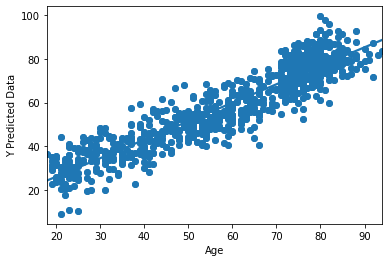

In [11]:
# Visualize the relationship between actual and predicted values using a scatter plot and a regression plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Y Predicted Data')
sns.regplot(x=y_test, y=y_pred, ci=None)

In [12]:
# Create a Pandas dataframe to show the actual and predicted values, as well as the difference between them
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
print(pred_df)

      Actual Value  Predicted Value  Difference
1612            80        86.172965   -6.172965
2726            58        56.158207    1.841793
2242            86        79.587575    6.412425
4130            78        83.286775   -5.286775
3973            68        64.811722    3.188278
...            ...              ...         ...
907             71        83.773321  -12.773321
80              85        84.838160    0.161840
257             76        86.083791  -10.083791
295             82        78.246882    3.753118
1593            74        71.123648    2.876352

[846 rows x 3 columns]
